Ось **розгорнутий контент для файлу `06_plotting.ipynb`**, присвячений **візуалізації аналітичних даних військового характеру** за допомогою бібліотек `matplotlib` і `pandas`.

---

# 📘 `06_plotting.ipynb`

## **Тема: Побудова графіків у військовій аналітиці**

---

### 🔹 Вступ

Візуалізація — ключовий елемент аналітичного процесу у військових штабах. Графіки допомагають виявити динаміку втрат, ефективність дій, зміни у стані підрозділів та багато іншого.

---

## 🔸 1. Імпорт бібліотек

```python
import pandas as pd
import matplotlib.pyplot as plt
```

> **Підготуємо дані:**

```python
df = pd.read_csv("losses.csv", encoding="utf-8")
df["Дата"] = pd.to_datetime(df["Дата"])
df = df.sort_values("Дата")
```

---

## 🔸 2. Лінійний графік втрат за днями

```python
plt.plot(df["Дата"], df["Втрати"])
plt.title("Втрати противника за датами")
plt.xlabel("Дата")
plt.ylabel("Кількість втрат")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

---

## 🔸 3. Стовпчиковий графік втрат за напрямками

```python
grouped = df.groupby("Напрямок")["Втрати"].sum()

grouped.plot(kind="bar")
plt.title("Сумарні втрати по напрямках")
plt.ylabel("Втрати")
plt.xlabel("Напрямок")
plt.grid(axis='y')
plt.show()
```

---

## 🔸 4. Кругова діаграма участі підрозділів

```python
unit_sum = df.groupby("Підрозділ")["Втрати"].sum()

unit_sum.plot(kind="pie", autopct="%1.1f%%")
plt.title("Участь підрозділів у бойових діях (за втратами)")
plt.ylabel("")
plt.show()
```

---

## 🔸 5. Побудова декількох графіків одночасно

```python
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df.groupby("Напрямок")["Втрати"].sum().plot(kind="bar", ax=ax[0])
ax[0].set_title("Втрати по напрямках")

df.groupby("Підрозділ")["Втрати"].sum().plot(kind="bar", ax=ax[1])
ax[1].set_title("Втрати по підрозділах")

plt.tight_layout()
plt.show()
```

---

## 🔸 6. Збереження графіку у файл

```python
plt.plot(df["Дата"], df["Втрати"])
plt.title("Втрати противника")
plt.savefig("losses_plot.png", dpi=300)
```

---

## 📝 Практичні завдання:

1. Побудувати графік динаміки втрат по днях.
2. Створити стовпчикову діаграму сумарних втрат по напрямках.
3. Вивести кругову діаграму частки втрат підрозділів.
4. Побудувати два графіки на одному полотні: по напрямках і по підрозділах.
5. Зберегти один з графіків у формат `.png`.




### Завдання 1. Побудувано графік динаміки втрат по днях.

In [19]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\5103_6\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Зчитування CSV-файлу (замінити на свій файл, якщо треба)
data = pd.read_csv("boyovi_vtraty.csv", encoding="utf-8")

# 2. Переконуємось, що колонка "Дата" є типом datetime
data['Дата'] = pd.to_datetime(data['Дата'], dayfirst=True)

# 3. Сортуємо дані за датою
data = data.sort_values('Дата')

# 4. Створення графіку
plt.figure(figsize=(12, 6))
plt.plot(data['Дата'], data['Втрати'], marker='o', linestyle='-', linewidth=2)

# 5. Оформлення графіку
plt.title('Динаміка бойових втрат по днях', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кількість втрат', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# 6. Показуємо графік
plt.tight_layout()
plt.show()


KeyError: 'Втрати'

<Figure size 1200x600 with 0 Axes>

In [ ]:
print(data.columns)


Index(['Дата', 'Танки', 'Артилерія', 'Літаки', 'Гелікоптери', 'БПЛА'], dtype='object')


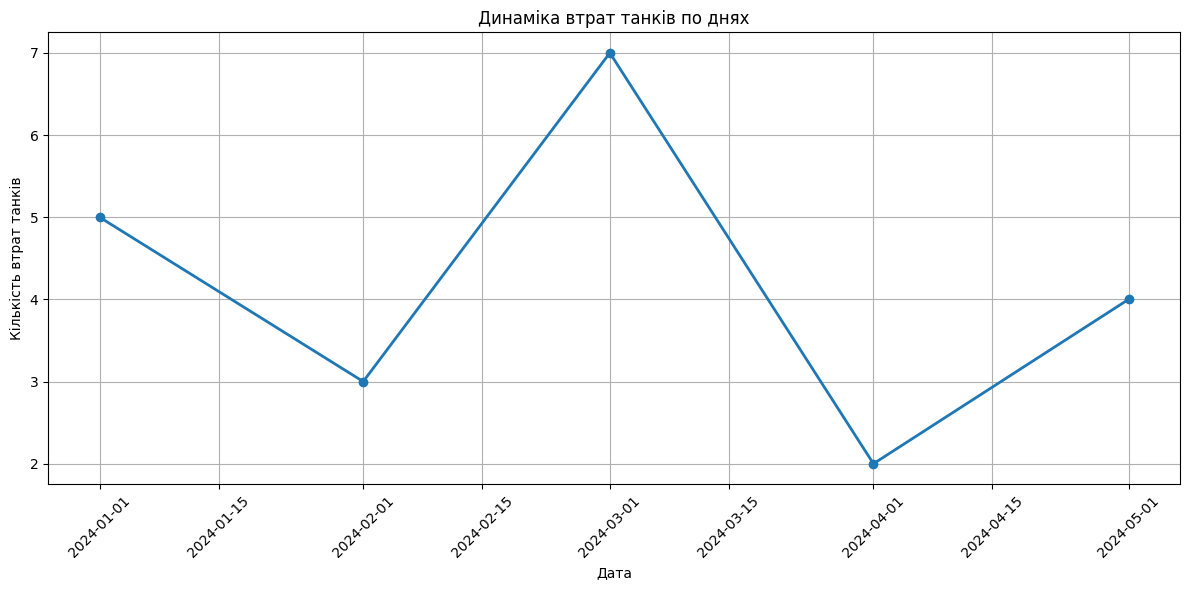

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитування CSV-файлу
data = pd.read_csv("boyovi_vtraty.csv", encoding="utf-8")

# Перетворення колонки 'Дата' у формат дати
data['Дата'] = pd.to_datetime(data['Дата'], dayfirst=True)

# Сортуємо дані за датою (на всяк випадок)
data = data.sort_values('Дата')

# Побудова графіка для танків
plt.figure(figsize=(12, 6))
plt.plot(data['Дата'], data['Танки'], marker='o', linestyle='-', linewidth=2)

# Оформлення
plt.title('Динаміка втрат танків по днях')
plt.xlabel('Дата')
plt.ylabel('Кількість втрат танків')
plt.grid(True)
plt.xticks(rotation=45)

# Показати графік
plt.tight_layout()
plt.show()


### Завдання 2. Створити стовпчикову діаграму сумарних втрат по напрямках.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитування даних з CSV-файлу (наприклад, "boyovi_vtraty.csv")
# У файлі повинні бути стовпці: "Напрямок" та "Втрати"
data = pd.read_csv("boyovi_vtraty.csv", encoding="utf-8")

# Групування даних за напрямками та підрахунок сумарних втрат
summary = data.groupby("Напрямок")["Втрати"].sum()

# Побудова стовпчикової діаграми
plt.figure(figsize=(10, 6))
summary.plot(kind="bar")

# Додаткове оформлення
plt.title("Сумарні бойові втрати по напрямках")
plt.xlabel("Напрямок")
plt.ylabel("Сумарні втрати")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показ графіка
plt.tight_layout()
plt.show()


KeyError: 'Напрямок'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитування CSV
data = pd.read_csv("boyovi_vtraty.csv", encoding="utf-8")

# Видалення пробілів у назвах стовпців
data.columns = data.columns.str.strip()

# Перевірка назв стовпців (можеш подивитися, якщо хочеш)
print("Стовпці:", data.columns)

# Групування за напрямками і підрахунок сумарних втрат
summary = data.groupby("Напрямок")["Втрати"].sum()

# Побудова графіка
plt.figure(figsize=(10, 6))
summary.plot(kind="bar")

plt.title("Сумарні бойові втрати по напрямках")
plt.xlabel("Напрямок")
plt.ylabel("Втрати")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Стовпці: Index(['Дата', 'Танки', 'Артилерія', 'Літаки', 'Гелікоптери', 'БПЛА'], dtype='object')


KeyError: 'Напрямок'

In [ ]:
print(data.head())


         Дата  Танки  Артилерія  Літаки  Гелікоптери  БПЛА
0  2024-01-01      5         12       0            1     4
1  2024-01-02      3         10       1            0     3
2  2024-01-03      7         15       0            1     6
3  2024-01-04      2          9       1            0     2
4  2024-01-05      4         11       0            0     5


In [ ]:
data["Напрямок"] = ["Схід", "Південь", "Схід", "Північ", ...]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитування CSV
data = pd.read_csv("boyovi_vtraty.csv", encoding="utf-8")
data.columns = data.columns.str.strip()

# Групування по напрямках та підрахунок сумарних втрат по всіх типах техніки
summary = data.groupby("Напрямок")[["Танки", "Артилерія", "БПЛА"]].sum()

# Побудова діаграми
summary.plot(kind="bar", figsize=(10, 6))

plt.title("Сумарні втрати по напрямках")
plt.xlabel("Напрямок")
plt.ylabel("Кількість втрат")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


KeyError: 'Напрямок'

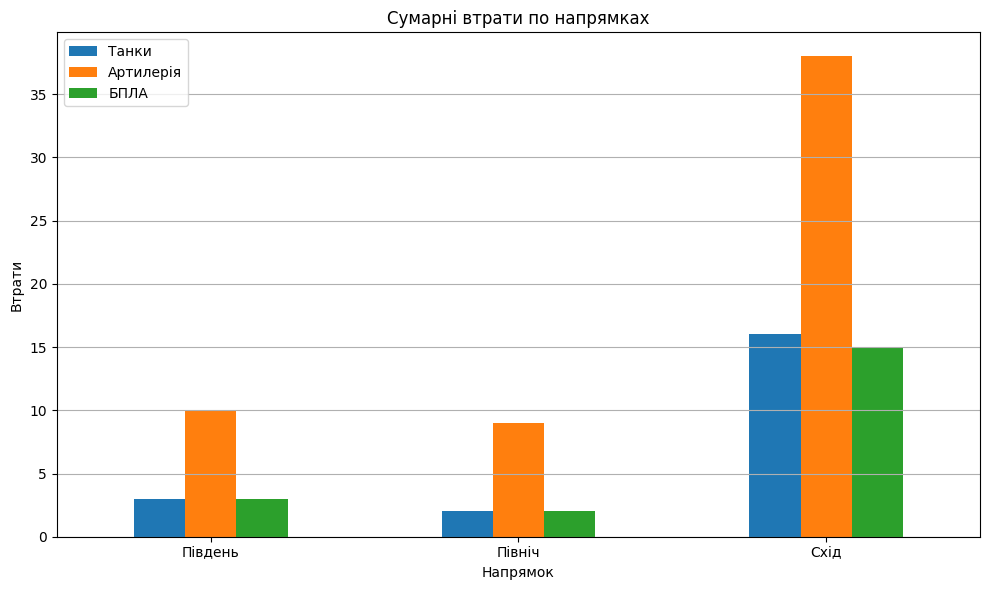

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитування CSV
data = pd.read_csv("boyovi_vtraty.csv", encoding="utf-8")
data.columns = data.columns.str.strip()

# Додаємо штучно напрямки для прикладу (має бути стільки ж, скільки рядків)
napriamky = ['Схід', 'Південь', 'Схід', 'Північ', 'Схід']  # ← приклад
data["Напрямок"] = napriamky

# Групування по напрямках і підрахунок сум
summary = data.groupby("Напрямок")[["Танки", "Артилерія", "БПЛА"]].sum()

# Побудова діаграми
summary.plot(kind="bar", figsize=(10, 6))
plt.title("Сумарні втрати по напрямках")
plt.xlabel("Напрямок")
plt.ylabel("Втрати")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Завдання 3. Виведино кругову діаграму частки втрат підрозділів.

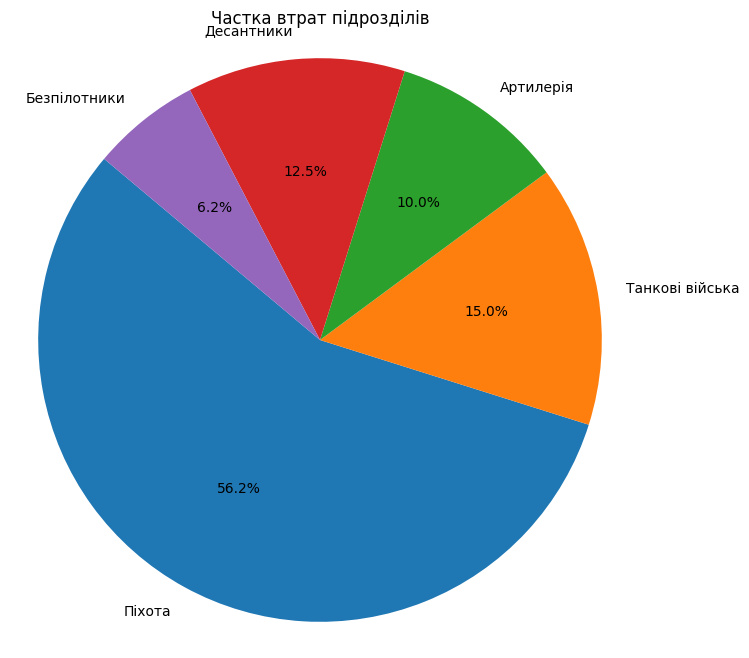

In [ ]:
import matplotlib.pyplot as plt

# Дані: назви підрозділів і кількість втрат (умовні числа)
pidrozdily = ['Піхота', 'Танкові війська', 'Артилерія', 'Десантники', 'Безпілотники']
vtraty = [4500, 1200, 800, 1000, 500]

# Створення кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(vtraty, labels=pidrozdily, autopct='%1.1f%%', startangle=140)
plt.title('Частка втрат підрозділів')
plt.axis('equal')  # Робить круг правильної форми

# Показ діаграми
plt.show()


### Завдання 4. Побудувано два графіки на одному полотні: по напрямках і по підрозділах.

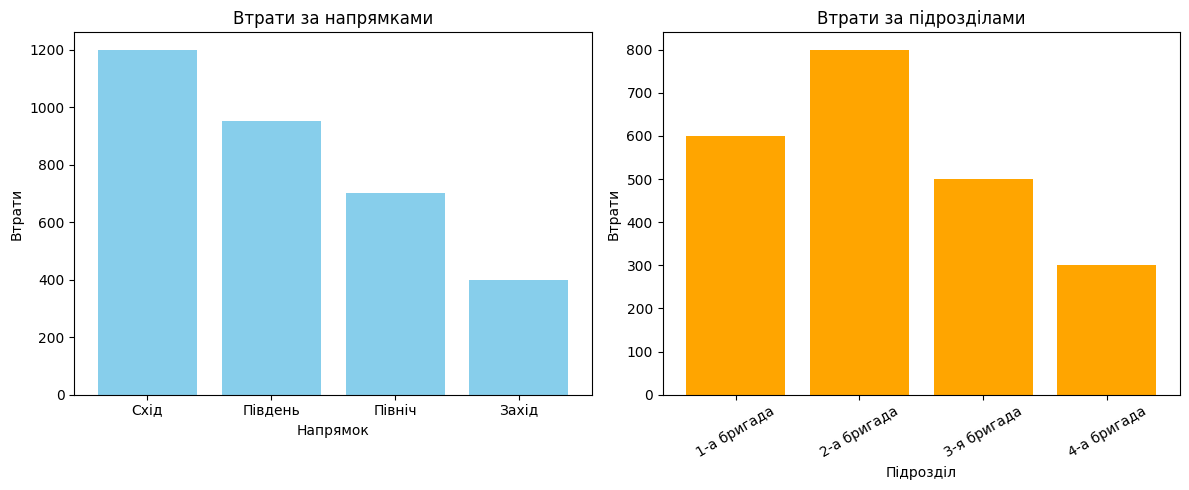

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Дані для прикладу
data_by_direction = {
    'Напрямок': ['Схід', 'Південь', 'Північ', 'Захід'],
    'Втрати': [1200, 950, 700, 400]
}

data_by_unit = {
    'Підрозділ': ['1-а бригада', '2-а бригада', '3-я бригада', '4-а бригада'],
    'Втрати': [600, 800, 500, 300]
}

# Перетворення у DataFrame
df_direction = pd.DataFrame(data_by_direction)
df_unit = pd.DataFrame(data_by_unit)

# Створення полотна з двома графіками
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 ряд, 2 стовпці

# Графік по напрямках
axs[0].bar(df_direction['Напрямок'], df_direction['Втрати'], color='skyblue')
axs[0].set_title('Втрати за напрямками')
axs[0].set_xlabel('Напрямок')
axs[0].set_ylabel('Втрати')

# Графік по підрозділах
axs[1].bar(df_unit['Підрозділ'], df_unit['Втрати'], color='orange')
axs[1].set_title('Втрати за підрозділами')
axs[1].set_xlabel('Підрозділ')
axs[1].set_ylabel('Втрати')
axs[1].tick_params(axis='x', rotation=30)

# Відображення
plt.tight_layout()
plt.show()


### Завдання 5. Збережено один з графіків у формат `.png`.

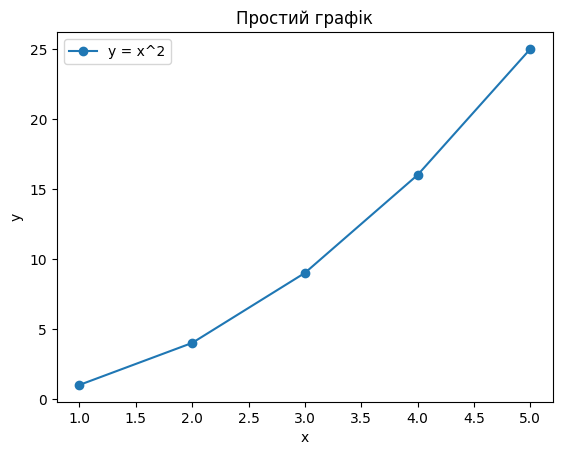

In [ ]:
import matplotlib.pyplot as plt

# Дані для графіка
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Побудова графіка
plt.plot(x, y, marker='o', label='y = x^2')

# Додавання підписів
plt.title('Простий графік')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Збереження графіка у файл .png
plt.savefig('miy_grafik.png')

# Відображення графіка (не обов’язково для збереження)
plt.show()
